# Import dataset

In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import pickle
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

#set folder path
folder = 'data'
#fd = folder + '/uncorrupted_signal_folder'
#fd_km = fd + '/Clusters4096'
fd = folder
fd_km = fd

In [105]:
data_train_raw = pd.read_pickle(fd_km + '/data_train_v1').reset_index().iloc[:,1:] #full set
data_test = pd.read_pickle(fd_km + '/data_test_v1').reset_index().iloc[:,1:]  

In [3]:
data_train

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,68053
1,1,500,0.000684,0.000693,0.000695,67553
2,1,1000,0.000684,0.000693,0.000695,67053
3,1,1500,0.000684,0.000693,0.000695,66553
4,1,2000,0.000684,0.000693,0.000695,66053
...,...,...,...,...,...,...
1385078,10000,66500,0.000118,0.000253,0.000761,2393
1385079,10000,67000,0.000097,0.000186,0.000755,1893
1385080,10000,67500,0.000078,0.000113,0.000743,1393
1385081,10000,68000,0.000060,0.000037,0.000718,893


In [4]:
data_train[data_train.ID == 1]

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,68053
1,1,500,0.000684,0.000693,0.000695,67553
2,1,1000,0.000684,0.000693,0.000695,67053
3,1,1500,0.000684,0.000693,0.000695,66553
4,1,2000,0.000684,0.000693,0.000695,66053
...,...,...,...,...,...,...
132,1,66000,0.000095,0.000178,0.000754,2053
133,1,66500,0.000078,0.000112,0.000743,1553
134,1,67000,0.000062,0.000044,0.000721,1053
135,1,67500,0.000047,-0.000022,0.000684,553


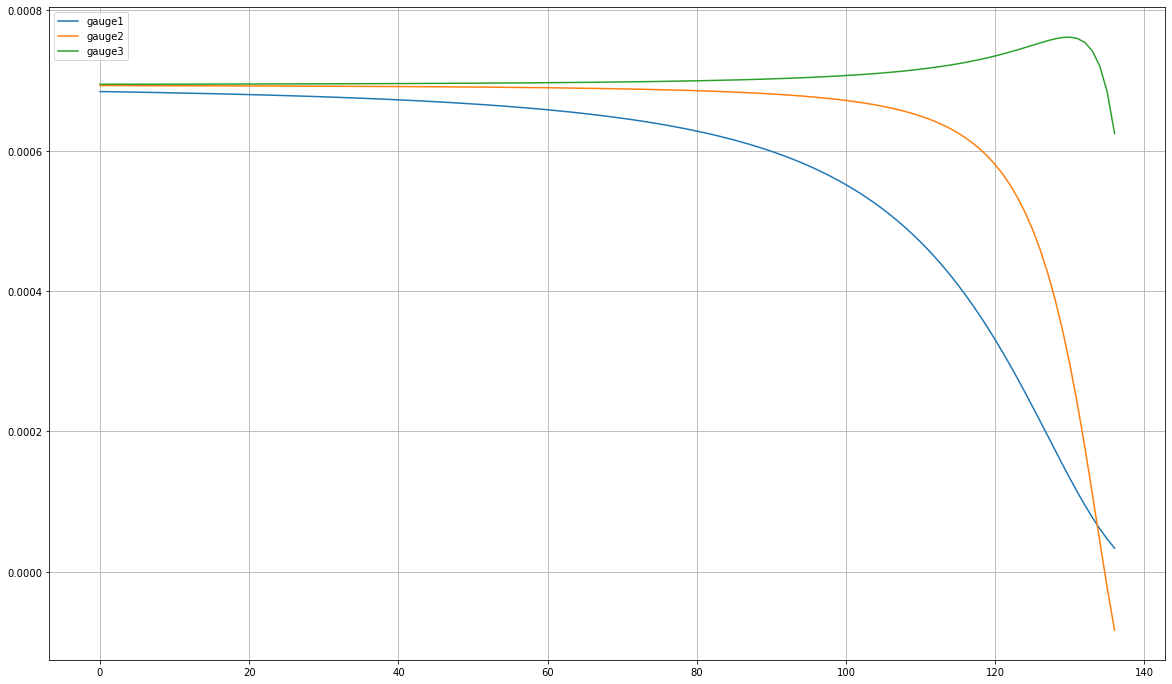

In [5]:
plt.figure(figsize=(20, 12))
plt.plot(data_train[data_train.ID == 1]['gauge1'],label= 'gauge1')
plt.plot(data_train[data_train.ID == 1][ 'gauge2'],label= 'gauge2')
plt.plot(data_train[data_train.ID == 1]['gauge3'], label= 'gauge3')
plt.grid()
plt.legend()
plt.show()

In [6]:
data_train.head(10)

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,68053
1,1,500,0.000684,0.000693,0.000695,67553
2,1,1000,0.000684,0.000693,0.000695,67053
3,1,1500,0.000684,0.000693,0.000695,66553
4,1,2000,0.000684,0.000693,0.000695,66053
5,1,2500,0.000683,0.000693,0.000695,65553
6,1,3000,0.000683,0.000693,0.000695,65053
7,1,3500,0.000683,0.000693,0.000695,64553
8,1,4000,0.000683,0.000693,0.000695,64053
9,1,4500,0.000683,0.000693,0.000695,63553


In [7]:
data_test[data_test.ID==1]

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,64540
1,1,500,0.000684,0.000693,0.000695,64040
2,1,1000,0.000684,0.000693,0.000695,63540
3,1,1500,0.000684,0.000693,0.000695,63040
4,1,2000,0.000684,0.000693,0.000695,62540
5,1,2500,0.000684,0.000693,0.000695,62040
6,1,3000,0.000683,0.000693,0.000695,61540
7,1,3500,0.000683,0.000693,0.000695,61040
8,1,4000,0.000683,0.000693,0.000695,60540
9,1,4500,0.000683,0.000693,0.000695,60040


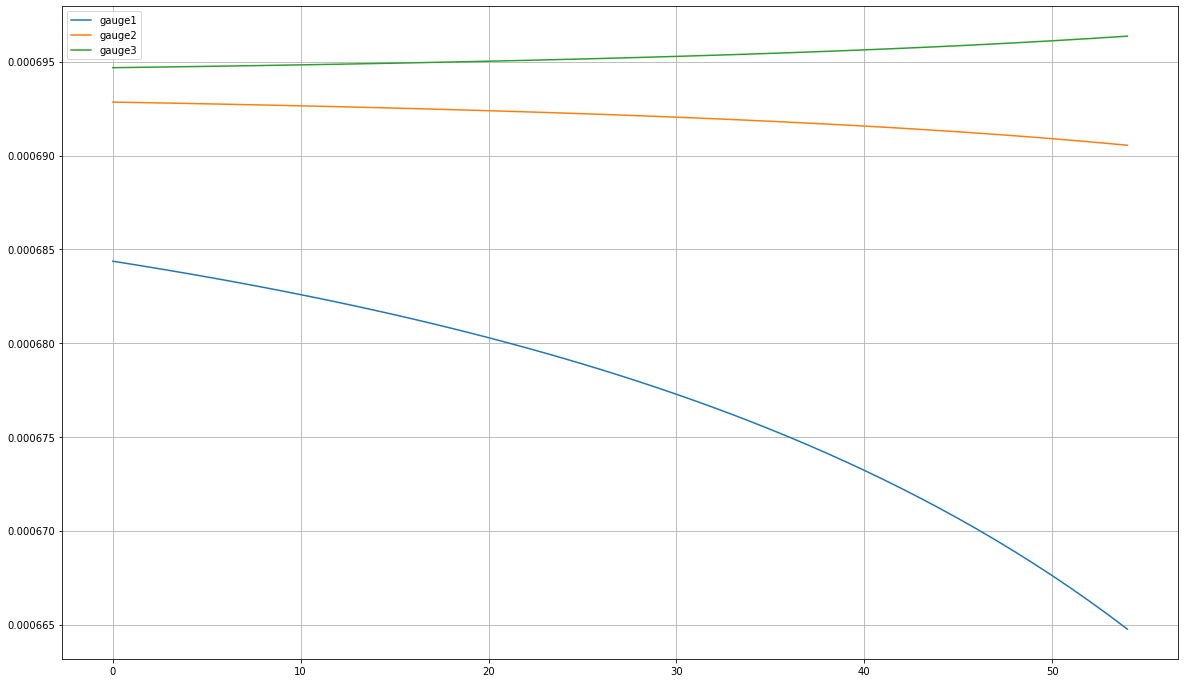

In [8]:
plt.figure(figsize=(20, 12))
plt.plot(data_test[data_test.ID == 1]['gauge1'],label= 'gauge1')
plt.plot(data_test[data_test.ID == 1][ 'gauge2'],label= 'gauge2')
plt.plot(data_test[data_test.ID == 1]['gauge3'], label= 'gauge3')
plt.grid()
plt.legend()
plt.show()

# Categorise RUL data

In [9]:
print(data_train.RUL.describe())
print(data_test.RUL.describe())

count    1.385083e+06
mean     3.477047e+04
std      2.023644e+04
min      0.000000e+00
25%      1.731200e+04
50%      3.462700e+04
75%      5.193900e+04
max      8.189600e+04
Name: RUL, dtype: float64
count     8782.000000
mean     45427.648144
std      15643.733322
min       3964.000000
25%      34177.000000
50%      46891.000000
75%      57867.500000
max      79327.000000
Name: RUL, dtype: float64


[    0.           221.6066482    886.4265928   1994.4598338
  3545.70637119  5540.16620499  7977.83933518 10858.72576177
 14182.82548476 17950.13850416 22160.66481994 26814.40443213
 31911.35734072 37451.52354571 43434.90304709 49861.49584488
 56731.30193906 64044.32132964 71800.55401662 80000.        ]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


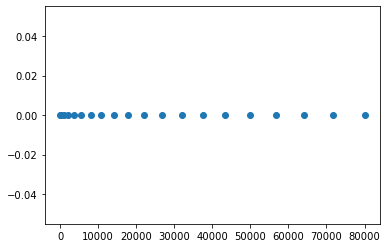

In [10]:
l=0.5
nb_bins = 20
lower_bin_bound = 0
upper_bin_bound = 80000

bins = np.linspace(lower_bin_bound, upper_bin_bound**l, nb_bins)**(1/l)
labels=[i for i in range(bins.shape[0]-1)]
plt.plot(bins,np.full(bins.shape[0],0),'o')
print(bins)
print(labels)

In [106]:
data_train_raw['RUL_bins'] = pd.cut(data_train_raw['RUL'], bins=bins, labels=labels)
data_test['RUL_bins'] = pd.cut(data_test['RUL'], bins=bins, labels=labels)

In [12]:
display(data_train)
display(data_test)

,ID,cycle,gauge1,gauge2,gauge3,RUL,RUL_bins
0,1,0,0.000684,0.000693,0.000695,68053,17
1,1,500,0.000684,0.000693,0.000695,67553,17
2,1,1000,0.000684,0.000693,0.000695,67053,17
3,1,1500,0.000684,0.000693,0.000695,66553,17
4,1,2000,0.000684,0.000693,0.000695,66053,17
...,...,...,...,...,...,...,...
1385078,10000,66500,0.000118,0.000253,0.000761,2393,3
1385079,10000,67000,0.000097,0.000186,0.000755,1893,2
1385080,10000,67500,0.000078,0.000113,0.000743,1393,2
1385081,10000,68000,0.000060,0.000037,0.000718,893,2


,ID,cycle,gauge1,gauge2,gauge3,RUL,RUL_bins
0,1,0,0.000684,0.000693,0.000695,64540,17
1,1,500,0.000684,0.000693,0.000695,64040,16
2,1,1000,0.000684,0.000693,0.000695,63540,16
3,1,1500,0.000684,0.000693,0.000695,63040,16
4,1,2000,0.000684,0.000693,0.000695,62540,16
...,...,...,...,...,...,...,...
8777,100,22000,0.000670,0.000691,0.000696,43346,13
8778,100,22500,0.000670,0.000691,0.000696,42846,13
8779,100,23000,0.000669,0.000691,0.000696,42346,13
8780,100,23500,0.000669,0.000691,0.000696,41846,13


# Build sequences

In [108]:
data_train

,ID,cycle,gauge1,gauge2,gauge3,RUL,RUL_bins
0,1,0,0.000684,0.000693,0.000695,68053,17
1,1,500,0.000684,0.000693,0.000695,67553,17
2,1,1000,0.000684,0.000693,0.000695,67053,17
3,1,1500,0.000684,0.000693,0.000695,66553,17
4,1,2000,0.000684,0.000693,0.000695,66053,17
...,...,...,...,...,...,...,...
132,1,66000,0.000095,0.000178,0.000754,2053,3
133,1,66500,0.000078,0.000112,0.000743,1553,2
134,1,67000,0.000062,0.000044,0.000721,1053,2
135,1,67500,0.000047,-0.000022,0.000684,553,1


In [157]:
#utils 
nb_gauges = 3
data_train = data_train_raw[data_train_raw.ID <= 100]
data_val = data_train_raw[data_train_raw.ID >= 9900]

#prepare forecasting data
def gen_X_sequence(id_df, seq_length, seq_cols,timesteps_pred,  type_data = None):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    
    
    ind_start = 0
    
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0+ind_start, num_elements-seq_length+1-timesteps_pred), range(seq_length+ind_start, num_elements+1-timesteps_pred)):
        yield data_array[start:stop, :]
 

def gen_Y_sequence(id_df, seq_length, seq_cols,timesteps_pred, type_data = None):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    
    
    ind_start = 0
    
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0+ind_start, num_elements-seq_length+1-timesteps_pred), range(seq_length+ind_start, num_elements+1-timesteps_pred)):
        yield data_array[stop-1, :]#data_array[start+1:stop+1, :]
   



 #prepare data
seq_cols =  ['gauge'+str(i) for i in range(1,4)]#['label'+str(i) for i in range(1,4)]
seq_cols1 =  ['RUL_bins']
sequence_length = 30
timesteps_pred = 1



#training set
seq_gen = (list(gen_X_sequence(data_train[data_train['ID']==id], sequence_length, seq_cols, timesteps_pred, type_data= 'train')) 
                   for id in data_train['ID'].unique())
# generate sequences and convert to numpy array
dbX = np.concatenate(list(seq_gen))



seq_gen = (list(gen_Y_sequence(data_train[data_train['ID']==id], sequence_length, seq_cols1, timesteps_pred, type_data= 'train')) 
                   for id in data_train['ID'].unique())
# generate sequences and convert to numpy array
dbY = np.concatenate(list(seq_gen))#.astype(np.long).reshape(-1,)

print(dbX.shape)
print(dbY.shape)

#test set
seq_gen = (list(gen_X_sequence(data_val[data_val['ID']==id], sequence_length, seq_cols, timesteps_pred, type_data= 'train')) 
                   for id in data_val['ID'].unique())
# generate sequences and convert to numpy array
dbX_val = np.concatenate(list(seq_gen))#.astype(np.long)

seq_gen = (list(gen_Y_sequence(data_val[data_val['ID']==id], sequence_length, seq_cols1, timesteps_pred, type_data= 'train')) 
                   for id in data_val['ID'].unique())
# generate sequences and convert to numpy array
dbY_val = np.concatenate(list(seq_gen))#.astype(np.long).reshape(-1,)

# dbX_val = (dbX_val + 1)/2
# dbY_val = (dbY_val + 1)/2
print(dbX_val.shape)
print(dbY_val.shape)

(10956, 30, 3)
(10956, 1)
(11026, 30, 3)
(11026, 1)


# Normalize data

In [14]:
dbX
dbX_val

array([[[0.00068437, 0.00069285, 0.00069468],
        [0.00068421, 0.00069283, 0.00069469],
        [0.00068404, 0.00069281, 0.00069471],
        ...,
        [0.00067827, 0.00069216, 0.0006952 ],
        [0.00067795, 0.00069212, 0.00069523],
        [0.00067762, 0.00069208, 0.00069525]],

       [[0.00068421, 0.00069283, 0.00069469],
        [0.00068404, 0.00069281, 0.00069471],
        [0.00068388, 0.00069279, 0.00069472],
        ...,
        [0.00067795, 0.00069212, 0.00069523],
        [0.00067762, 0.00069208, 0.00069525],
        [0.00067728, 0.00069204, 0.00069528]],

       [[0.00068404, 0.00069281, 0.00069471],
        [0.00068388, 0.00069279, 0.00069472],
        [0.00068371, 0.00069277, 0.00069474],
        ...,
        [0.00067762, 0.00069208, 0.00069525],
        [0.00067728, 0.00069204, 0.00069528],
        [0.00067692, 0.000692  , 0.00069531]],

       ...,

       [[0.00068095, 0.00069246, 0.00069497],
        [0.00068071, 0.00069244, 0.00069499],
        [0.00068045, 0

# One-hot encoding

In [162]:
from tensorflow.keras.utils import to_categorical

dbY = to_categorical(dbY,nb_bins)
dbY_val = to_categorical(dbY_val,nb_bins)

# Build model

In [149]:
import numpy as np
from keras.models import *
from keras.layers import *
#Dense, Dropout, LSTM, Conv1D, Conv2D, MaxPooling2D, Flatten, BatchNormalization, LayerNormalization
from keras.optimizers import Adam

In [163]:
# Model based on 
model = Sequential()  # Instantiate sequential model
model.add(Conv1D(10, 10, activation='tanh', padding="same", input_shape=(dbX.shape[1], dbX.shape[2])))
#model.add(MaxPooling2D((3, 1)))
model.add(Conv1D(10, 10, activation='tanh', padding="same"))
model.add(Conv1D(10, 10, activation='tanh', padding="same"))
model.add(Conv1D(10, 10, activation='tanh', padding="same"))
model.add(Conv1D(3, 3, activation='tanh', padding="same"))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(dbY.shape[1], activation='softmax'))

In [164]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_80 (Conv1D)           (None, 30, 10)            310       
_________________________________________________________________
conv1d_81 (Conv1D)           (None, 30, 10)            1010      
_________________________________________________________________
conv1d_82 (Conv1D)           (None, 30, 10)            1010      
_________________________________________________________________
conv1d_83 (Conv1D)           (None, 30, 10)            1010      
_________________________________________________________________
conv1d_84 (Conv1D)           (None, 30, 3)             93        
_________________________________________________________________
flatten_24 (Flatten)         (None, 90)                0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 90)              

In [64]:
dbX.shape

(10956, 30, 3)

In [65]:
dbY.reshape(-1).shape

(10956,)

In [168]:
# model1 based on 
history_seq = Input(shape=(dbX.shape[1], dbX.shape[2]))
x = history_seq  # Instantiate sequential model1

x = LayerNormalization()(x)
x = Conv1D(64, 8, activation='relu', padding="same")(x)
x = Conv1D(64, 8, activation='relu', padding="same")(x)
x = Flatten()(x)
x = Dropout(0.0)(x)
x = Dense(nb_bins, activation='softmax')(x)

model1 = Model(history_seq, x)

In [166]:
# model1 based on 
model1 = Sequential()  # Instantiate sequential model1
model1.add(Conv1D(64, 8, activation='relu', padding="same", input_shape=(dbX.shape[1], dbX.shape[2])))
model1.add(BatchNormalization())
#model1.add(MaxPooling2D((3, 1)))
model1.add(Conv1D(64, 8, activation='relu', padding="same"))
#model1.add(Conv1D(32, 8, activation='relu', padding="same"))
#model1.add(Conv1D(32, 8, activation='relu', padding="same"))
#model1.add(Conv1D(3, 3, activation='relu', padding="same"))
model1.add(Flatten())
model1.add(Dropout(0.2))
model1.add(Dense(nb_bins, activation='softmax'))

In [169]:
model1.summary()

Model: "functional_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 30, 3)]           0         
_________________________________________________________________
layer_normalization_7 (Layer (None, 30, 3)             6         
_________________________________________________________________
conv1d_89 (Conv1D)           (None, 30, 64)            1600      
_________________________________________________________________
conv1d_90 (Conv1D)           (None, 30, 64)            32832     
_________________________________________________________________
flatten_27 (Flatten)         (None, 1920)              0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 1920)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 20)               

In [170]:
opt = Adam(learning_rate=0.001)
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.save('best_model1.h5')

In [ ]:
saved_model1 = model1
es = keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0, patience=500, verbose=0, mode='min')
mc = keras.callbacks.ModelCheckpoint('best_model1.h5', monitor='accuracy', mode='min', save_best_only=True)

for l_r in [0.01, 0.001, 0.0001] :
    K.set_value(saved_model_lstm.optimizer.learning_rate, l_r)
    history = saved_model1.fit(dbX,
                               dbY,
                               epochs=1000,
                               batch_size=4096, validation_data=(dbX_val, dbY_val), callbacks = [es,mc])
    saved_model1 = load_model('best_model1.h5')

In [171]:
batch_size = 4096
epochs = 300
history = model1.fit(dbX, dbY, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(dbX_val, dbY_val))

Epoch 1/300
3/3 - 1s - loss: 2.9936 - accuracy: 0.0782 - val_loss: 2.9850 - val_accuracy: 0.0772
Epoch 2/300
3/3 - 1s - loss: 2.9772 - accuracy: 0.0772 - val_loss: 2.9509 - val_accuracy: 0.0772
Epoch 3/300
3/3 - 1s - loss: 2.9322 - accuracy: 0.0772 - val_loss: 2.8767 - val_accuracy: 0.0772
Epoch 4/300
3/3 - 1s - loss: 2.8456 - accuracy: 0.0772 - val_loss: 2.7656 - val_accuracy: 0.0772
Epoch 5/300
3/3 - 1s - loss: 2.7365 - accuracy: 0.0772 - val_loss: 2.6837 - val_accuracy: 0.1095
Epoch 6/300
3/3 - 1s - loss: 2.6783 - accuracy: 0.1090 - val_loss: 2.6830 - val_accuracy: 0.1109
Epoch 7/300
3/3 - 1s - loss: 2.6794 - accuracy: 0.1133 - val_loss: 2.6613 - val_accuracy: 0.1109
Epoch 8/300
3/3 - 1s - loss: 2.6488 - accuracy: 0.1133 - val_loss: 2.6359 - val_accuracy: 0.1109
Epoch 9/300
3/3 - 1s - loss: 2.6328 - accuracy: 0.1133 - val_loss: 2.6325 - val_accuracy: 0.1109
Epoch 10/300
3/3 - 1s - loss: 2.6292 - accuracy: 0.1133 - val_loss: 2.6264 - val_accuracy: 0.1095
Epoch 11/300
3/3 - 1s - loss:

Epoch 85/300
3/3 - 1s - loss: 1.3821 - accuracy: 0.5124 - val_loss: 1.4091 - val_accuracy: 0.4520
Epoch 86/300
3/3 - 1s - loss: 1.3691 - accuracy: 0.5158 - val_loss: 1.4094 - val_accuracy: 0.4416
Epoch 87/300
3/3 - 1s - loss: 1.3674 - accuracy: 0.5115 - val_loss: 1.4016 - val_accuracy: 0.4966
Epoch 88/300
3/3 - 1s - loss: 1.3583 - accuracy: 0.5256 - val_loss: 1.3977 - val_accuracy: 0.5063
Epoch 89/300
3/3 - 1s - loss: 1.3611 - accuracy: 0.5133 - val_loss: 1.4084 - val_accuracy: 0.4101
Epoch 90/300
3/3 - 1s - loss: 1.3762 - accuracy: 0.4629 - val_loss: 1.3955 - val_accuracy: 0.5225
Epoch 91/300
3/3 - 1s - loss: 1.3478 - accuracy: 0.5243 - val_loss: 1.4115 - val_accuracy: 0.4757
Epoch 92/300
3/3 - 1s - loss: 1.3678 - accuracy: 0.4611 - val_loss: 1.3783 - val_accuracy: 0.4843
Epoch 93/300
3/3 - 1s - loss: 1.3399 - accuracy: 0.5099 - val_loss: 1.3932 - val_accuracy: 0.4147
Epoch 94/300
3/3 - 1s - loss: 1.3430 - accuracy: 0.4668 - val_loss: 1.3708 - val_accuracy: 0.5187
Epoch 95/300
3/3 - 1

Epoch 168/300
3/3 - 1s - loss: 1.1757 - accuracy: 0.4765 - val_loss: 1.2178 - val_accuracy: 0.5154
Epoch 169/300
3/3 - 1s - loss: 1.1337 - accuracy: 0.5769 - val_loss: 1.2016 - val_accuracy: 0.5435
Epoch 170/300
3/3 - 1s - loss: 1.1454 - accuracy: 0.5678 - val_loss: 1.2713 - val_accuracy: 0.4537
Epoch 171/300
3/3 - 1s - loss: 1.1768 - accuracy: 0.4940 - val_loss: 1.1950 - val_accuracy: 0.5355
Epoch 172/300
3/3 - 1s - loss: 1.1361 - accuracy: 0.5609 - val_loss: 1.2660 - val_accuracy: 0.4273
Epoch 173/300
3/3 - 1s - loss: 1.1891 - accuracy: 0.4639 - val_loss: 1.2029 - val_accuracy: 0.4973
Epoch 174/300
3/3 - 1s - loss: 1.1347 - accuracy: 0.5389 - val_loss: 1.2766 - val_accuracy: 0.4211
Epoch 175/300
3/3 - 1s - loss: 1.2013 - accuracy: 0.4566 - val_loss: 1.1967 - val_accuracy: 0.5326
Epoch 176/300
3/3 - 1s - loss: 1.1599 - accuracy: 0.5350 - val_loss: 1.2983 - val_accuracy: 0.3981
Epoch 177/300
3/3 - 1s - loss: 1.1743 - accuracy: 0.4878 - val_loss: 1.2199 - val_accuracy: 0.4898
Epoch 178/

Epoch 251/300
3/3 - 1s - loss: 1.0236 - accuracy: 0.5892 - val_loss: 1.1196 - val_accuracy: 0.5638
Epoch 252/300
3/3 - 1s - loss: 1.0353 - accuracy: 0.6061 - val_loss: 1.1301 - val_accuracy: 0.5333
Epoch 253/300
3/3 - 1s - loss: 1.0391 - accuracy: 0.5741 - val_loss: 1.1147 - val_accuracy: 0.5577
Epoch 254/300
3/3 - 1s - loss: 1.0260 - accuracy: 0.6068 - val_loss: 1.1080 - val_accuracy: 0.5881
Epoch 255/300
3/3 - 1s - loss: 1.0300 - accuracy: 0.6091 - val_loss: 1.1916 - val_accuracy: 0.4486
Epoch 256/300
3/3 - 1s - loss: 1.0958 - accuracy: 0.5012 - val_loss: 1.1155 - val_accuracy: 0.5340
Epoch 257/300
3/3 - 1s - loss: 1.0289 - accuracy: 0.5839 - val_loss: 1.2009 - val_accuracy: 0.4285
Epoch 258/300
3/3 - 1s - loss: 1.1249 - accuracy: 0.4608 - val_loss: 1.1301 - val_accuracy: 0.5375
Epoch 259/300
3/3 - 1s - loss: 1.0473 - accuracy: 0.5785 - val_loss: 1.2359 - val_accuracy: 0.3969
Epoch 260/300
3/3 - 1s - loss: 1.1483 - accuracy: 0.4365 - val_loss: 1.1131 - val_accuracy: 0.5132
Epoch 261/

In [101]:
epochs = 500
history = model1.fit(dbX, dbY, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(dbX_val, dbY_val))

Epoch 1/500
3/3 - 1s - loss: 1.2092 - accuracy: 0.5041 - val_loss: 1.3703 - val_accuracy: 0.4677
Epoch 2/500
3/3 - 1s - loss: 1.2062 - accuracy: 0.5092 - val_loss: 1.3698 - val_accuracy: 0.4991
Epoch 3/500
3/3 - 1s - loss: 1.2071 - accuracy: 0.5099 - val_loss: 1.3699 - val_accuracy: 0.4620
Epoch 4/500
3/3 - 1s - loss: 1.2054 - accuracy: 0.5109 - val_loss: 1.3689 - val_accuracy: 0.4770
Epoch 5/500
3/3 - 1s - loss: 1.2085 - accuracy: 0.5060 - val_loss: 1.3687 - val_accuracy: 0.4888
Epoch 6/500
3/3 - 1s - loss: 1.2053 - accuracy: 0.5110 - val_loss: 1.3695 - val_accuracy: 0.4542
Epoch 7/500
3/3 - 1s - loss: 1.2065 - accuracy: 0.5058 - val_loss: 1.3682 - val_accuracy: 0.4732
Epoch 8/500
3/3 - 1s - loss: 1.2047 - accuracy: 0.5131 - val_loss: 1.3681 - val_accuracy: 0.4908
Epoch 9/500
3/3 - 1s - loss: 1.2049 - accuracy: 0.5046 - val_loss: 1.3682 - val_accuracy: 0.4649
Epoch 10/500
3/3 - 1s - loss: 1.2026 - accuracy: 0.5099 - val_loss: 1.3680 - val_accuracy: 0.4664
Epoch 11/500
3/3 - 1s - loss:

Epoch 85/500
3/3 - 1s - loss: 1.1892 - accuracy: 0.5141 - val_loss: 1.3481 - val_accuracy: 0.4934
Epoch 86/500
3/3 - 1s - loss: 1.1900 - accuracy: 0.5115 - val_loss: 1.3481 - val_accuracy: 0.4818
Epoch 87/500
3/3 - 1s - loss: 1.1873 - accuracy: 0.5142 - val_loss: 1.3477 - val_accuracy: 0.4927
Epoch 88/500
3/3 - 1s - loss: 1.1886 - accuracy: 0.5110 - val_loss: 1.3478 - val_accuracy: 0.4827
Epoch 89/500
3/3 - 1s - loss: 1.1860 - accuracy: 0.5158 - val_loss: 1.3478 - val_accuracy: 0.4789
Epoch 90/500
3/3 - 1s - loss: 1.1890 - accuracy: 0.5166 - val_loss: 1.3472 - val_accuracy: 0.5024
Epoch 91/500
3/3 - 1s - loss: 1.1866 - accuracy: 0.5179 - val_loss: 1.3477 - val_accuracy: 0.4706
Epoch 92/500
3/3 - 1s - loss: 1.1855 - accuracy: 0.5173 - val_loss: 1.3466 - val_accuracy: 0.4907
Epoch 93/500
3/3 - 1s - loss: 1.1852 - accuracy: 0.5141 - val_loss: 1.3469 - val_accuracy: 0.4741
Epoch 94/500
3/3 - 1s - loss: 1.1900 - accuracy: 0.5054 - val_loss: 1.3463 - val_accuracy: 0.4874
Epoch 95/500
3/3 - 1

Epoch 168/500
3/3 - 1s - loss: 1.1753 - accuracy: 0.5173 - val_loss: 1.3329 - val_accuracy: 0.4946
Epoch 169/500
3/3 - 1s - loss: 1.1744 - accuracy: 0.5114 - val_loss: 1.3328 - val_accuracy: 0.4927
Epoch 170/500
3/3 - 1s - loss: 1.1752 - accuracy: 0.5201 - val_loss: 1.3326 - val_accuracy: 0.4929
Epoch 171/500
3/3 - 1s - loss: 1.1766 - accuracy: 0.5143 - val_loss: 1.3323 - val_accuracy: 0.5002
Epoch 172/500
3/3 - 1s - loss: 1.1760 - accuracy: 0.5180 - val_loss: 1.3324 - val_accuracy: 0.4867
Epoch 173/500
3/3 - 1s - loss: 1.1746 - accuracy: 0.5188 - val_loss: 1.3320 - val_accuracy: 0.4882
Epoch 174/500
3/3 - 1s - loss: 1.1755 - accuracy: 0.5143 - val_loss: 1.3316 - val_accuracy: 0.4907
Epoch 175/500
3/3 - 1s - loss: 1.1748 - accuracy: 0.5182 - val_loss: 1.3314 - val_accuracy: 0.4931
Epoch 176/500
3/3 - 1s - loss: 1.1720 - accuracy: 0.5201 - val_loss: 1.3314 - val_accuracy: 0.4886
Epoch 177/500
3/3 - 1s - loss: 1.1746 - accuracy: 0.5139 - val_loss: 1.3311 - val_accuracy: 0.4929
Epoch 178/

Epoch 251/500
3/3 - 1s - loss: 1.1631 - accuracy: 0.5193 - val_loss: 1.3209 - val_accuracy: 0.4708
Epoch 252/500
3/3 - 1s - loss: 1.1636 - accuracy: 0.5212 - val_loss: 1.3187 - val_accuracy: 0.5102
Epoch 253/500
3/3 - 1s - loss: 1.1626 - accuracy: 0.5190 - val_loss: 1.3190 - val_accuracy: 0.4898
Epoch 254/500
3/3 - 1s - loss: 1.1661 - accuracy: 0.5152 - val_loss: 1.3185 - val_accuracy: 0.5043
Epoch 255/500
3/3 - 1s - loss: 1.1650 - accuracy: 0.5225 - val_loss: 1.3186 - val_accuracy: 0.4958
Epoch 256/500
3/3 - 1s - loss: 1.1632 - accuracy: 0.5183 - val_loss: 1.3188 - val_accuracy: 0.4915
Epoch 257/500
3/3 - 1s - loss: 1.1629 - accuracy: 0.5214 - val_loss: 1.3181 - val_accuracy: 0.5135
Epoch 258/500
3/3 - 1s - loss: 1.1634 - accuracy: 0.5204 - val_loss: 1.3190 - val_accuracy: 0.4867
Epoch 259/500
3/3 - 1s - loss: 1.1640 - accuracy: 0.5241 - val_loss: 1.3177 - val_accuracy: 0.5036
Epoch 260/500
3/3 - 1s - loss: 1.1648 - accuracy: 0.5149 - val_loss: 1.3187 - val_accuracy: 0.4820
Epoch 261/

Epoch 334/500
3/3 - 1s - loss: 1.1531 - accuracy: 0.5255 - val_loss: 1.3066 - val_accuracy: 0.5036
Epoch 335/500
3/3 - 1s - loss: 1.1564 - accuracy: 0.5154 - val_loss: 1.3068 - val_accuracy: 0.4953
Epoch 336/500
3/3 - 1s - loss: 1.1558 - accuracy: 0.5192 - val_loss: 1.3065 - val_accuracy: 0.4971
Epoch 337/500
3/3 - 1s - loss: 1.1515 - accuracy: 0.5260 - val_loss: 1.3062 - val_accuracy: 0.5031
Epoch 338/500
3/3 - 1s - loss: 1.1524 - accuracy: 0.5256 - val_loss: 1.3064 - val_accuracy: 0.4981
Epoch 339/500
3/3 - 1s - loss: 1.1538 - accuracy: 0.5224 - val_loss: 1.3059 - val_accuracy: 0.5161
Epoch 340/500
3/3 - 1s - loss: 1.1543 - accuracy: 0.5258 - val_loss: 1.3067 - val_accuracy: 0.4898
Epoch 341/500
3/3 - 1s - loss: 1.1515 - accuracy: 0.5251 - val_loss: 1.3055 - val_accuracy: 0.5055
Epoch 342/500
3/3 - 1s - loss: 1.1544 - accuracy: 0.5194 - val_loss: 1.3056 - val_accuracy: 0.4972
Epoch 343/500
3/3 - 1s - loss: 1.1564 - accuracy: 0.5212 - val_loss: 1.3054 - val_accuracy: 0.4957
Epoch 344/

Epoch 417/500
3/3 - 1s - loss: 1.1448 - accuracy: 0.5232 - val_loss: 1.2947 - val_accuracy: 0.5095
Epoch 418/500
3/3 - 1s - loss: 1.1440 - accuracy: 0.5225 - val_loss: 1.2945 - val_accuracy: 0.5095
Epoch 419/500
3/3 - 1s - loss: 1.1452 - accuracy: 0.5164 - val_loss: 1.2944 - val_accuracy: 0.5052
Epoch 420/500
3/3 - 1s - loss: 1.1447 - accuracy: 0.5270 - val_loss: 1.2945 - val_accuracy: 0.5036
Epoch 421/500
3/3 - 1s - loss: 1.1438 - accuracy: 0.5272 - val_loss: 1.2943 - val_accuracy: 0.5036
Epoch 422/500
3/3 - 1s - loss: 1.1442 - accuracy: 0.5303 - val_loss: 1.2943 - val_accuracy: 0.5021
Epoch 423/500
3/3 - 1s - loss: 1.1461 - accuracy: 0.5197 - val_loss: 1.2939 - val_accuracy: 0.5126
Epoch 424/500
3/3 - 1s - loss: 1.1415 - accuracy: 0.5272 - val_loss: 1.2945 - val_accuracy: 0.4962
Epoch 425/500
3/3 - 1s - loss: 1.1463 - accuracy: 0.5255 - val_loss: 1.2939 - val_accuracy: 0.5080
Epoch 426/500
3/3 - 1s - loss: 1.1443 - accuracy: 0.5261 - val_loss: 1.2940 - val_accuracy: 0.5033
Epoch 427/

Epoch 500/500
3/3 - 1s - loss: 1.1390 - accuracy: 0.5237 - val_loss: 1.2841 - val_accuracy: 0.4997


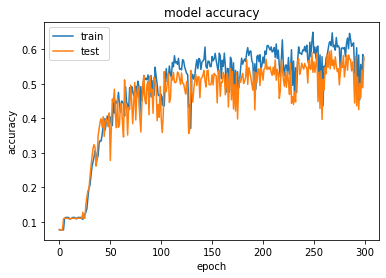

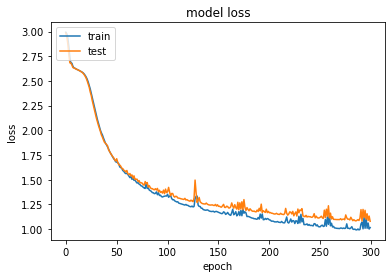

In [172]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
opt = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [45]:
batch_size = 512
epochs = 300
history = model.fit(dbX, dbY, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(dbX_val, dbY_val))

Epoch 1/300
22/22 - 1s - loss: 0.1984 - accuracy: 0.0515 - val_loss: 0.1982 - val_accuracy: 0.1352
Epoch 2/300
22/22 - 1s - loss: 0.1981 - accuracy: 0.0624 - val_loss: 0.1973 - val_accuracy: 0.1352
Epoch 3/300
22/22 - 1s - loss: 0.1972 - accuracy: 0.0716 - val_loss: 0.1950 - val_accuracy: 0.1352
Epoch 4/300
22/22 - 1s - loss: 0.1958 - accuracy: 0.0846 - val_loss: 0.1912 - val_accuracy: 0.1352
Epoch 5/300
22/22 - 1s - loss: 0.1940 - accuracy: 0.0891 - val_loss: 0.1878 - val_accuracy: 0.1352
Epoch 6/300
22/22 - 1s - loss: 0.1927 - accuracy: 0.0933 - val_loss: 0.1854 - val_accuracy: 0.1352
Epoch 7/300
22/22 - 1s - loss: 0.1915 - accuracy: 0.0933 - val_loss: 0.1833 - val_accuracy: 0.1352
Epoch 8/300
22/22 - 1s - loss: 0.1901 - accuracy: 0.0971 - val_loss: 0.1814 - val_accuracy: 0.1352
Epoch 9/300
22/22 - 1s - loss: 0.1895 - accuracy: 0.0899 - val_loss: 0.1800 - val_accuracy: 0.1352
Epoch 10/300
22/22 - 1s - loss: 0.1885 - accuracy: 0.0922 - val_loss: 0.1788 - val_accuracy: 0.1352
Epoch 11/

22/22 - 1s - loss: 0.1809 - accuracy: 0.0995 - val_loss: 0.1684 - val_accuracy: 0.2027
Epoch 84/300
22/22 - 1s - loss: 0.1807 - accuracy: 0.1077 - val_loss: 0.1682 - val_accuracy: 0.2027
Epoch 85/300
22/22 - 1s - loss: 0.1808 - accuracy: 0.1006 - val_loss: 0.1690 - val_accuracy: 0.2027
Epoch 86/300
22/22 - 1s - loss: 0.1806 - accuracy: 0.1044 - val_loss: 0.1686 - val_accuracy: 0.2027
Epoch 87/300
22/22 - 1s - loss: 0.1806 - accuracy: 0.1101 - val_loss: 0.1682 - val_accuracy: 0.2027
Epoch 88/300
22/22 - 1s - loss: 0.1804 - accuracy: 0.1081 - val_loss: 0.1679 - val_accuracy: 0.2027
Epoch 89/300
22/22 - 1s - loss: 0.1806 - accuracy: 0.1065 - val_loss: 0.1688 - val_accuracy: 0.2027
Epoch 90/300
22/22 - 1s - loss: 0.1805 - accuracy: 0.1049 - val_loss: 0.1675 - val_accuracy: 0.2027
Epoch 91/300
22/22 - 1s - loss: 0.1806 - accuracy: 0.1015 - val_loss: 0.1685 - val_accuracy: 0.2027
Epoch 92/300
22/22 - 1s - loss: 0.1805 - accuracy: 0.1080 - val_loss: 0.1686 - val_accuracy: 0.2027
Epoch 93/300


Epoch 165/300
22/22 - 1s - loss: 0.1370 - accuracy: 0.2815 - val_loss: 0.1358 - val_accuracy: 0.2861
Epoch 166/300
22/22 - 1s - loss: 0.1364 - accuracy: 0.2762 - val_loss: 0.1356 - val_accuracy: 0.3068
Epoch 167/300
22/22 - 1s - loss: 0.1360 - accuracy: 0.2710 - val_loss: 0.1348 - val_accuracy: 0.2971
Epoch 168/300
22/22 - 1s - loss: 0.1356 - accuracy: 0.2735 - val_loss: 0.1345 - val_accuracy: 0.3139
Epoch 169/300
22/22 - 1s - loss: 0.1345 - accuracy: 0.2807 - val_loss: 0.1335 - val_accuracy: 0.2810
Epoch 170/300
22/22 - 1s - loss: 0.1343 - accuracy: 0.2819 - val_loss: 0.1330 - val_accuracy: 0.2812
Epoch 171/300
22/22 - 1s - loss: 0.1337 - accuracy: 0.2881 - val_loss: 0.1328 - val_accuracy: 0.3167
Epoch 172/300
22/22 - 1s - loss: 0.1324 - accuracy: 0.2951 - val_loss: 0.1326 - val_accuracy: 0.3324
Epoch 173/300
22/22 - 1s - loss: 0.1317 - accuracy: 0.3019 - val_loss: 0.1316 - val_accuracy: 0.2743
Epoch 174/300
22/22 - 1s - loss: 0.1310 - accuracy: 0.3045 - val_loss: 0.1317 - val_accurac

22/22 - 1s - loss: 0.1060 - accuracy: 0.4509 - val_loss: 0.1087 - val_accuracy: 0.4701
Epoch 247/300
22/22 - 1s - loss: 0.1062 - accuracy: 0.4442 - val_loss: 0.1101 - val_accuracy: 0.5410
Epoch 248/300
22/22 - 1s - loss: 0.1061 - accuracy: 0.4482 - val_loss: 0.1088 - val_accuracy: 0.4230
Epoch 249/300
22/22 - 1s - loss: 0.1061 - accuracy: 0.4451 - val_loss: 0.1088 - val_accuracy: 0.5355
Epoch 250/300
22/22 - 1s - loss: 0.1053 - accuracy: 0.4530 - val_loss: 0.1080 - val_accuracy: 0.4703
Epoch 251/300
22/22 - 1s - loss: 0.1053 - accuracy: 0.4538 - val_loss: 0.1078 - val_accuracy: 0.4920
Epoch 252/300
22/22 - 1s - loss: 0.1055 - accuracy: 0.4493 - val_loss: 0.1085 - val_accuracy: 0.5498
Epoch 253/300
22/22 - 1s - loss: 0.1051 - accuracy: 0.4531 - val_loss: 0.1074 - val_accuracy: 0.5016
Epoch 254/300
22/22 - 1s - loss: 0.1050 - accuracy: 0.4518 - val_loss: 0.1099 - val_accuracy: 0.3639
Epoch 255/300
22/22 - 1s - loss: 0.1056 - accuracy: 0.4437 - val_loss: 0.1074 - val_accuracy: 0.5382
Epoc

In [46]:
model.evaluate(dbX_val, dbY_val)

181/181 [==============================] - 0s 2ms/step - loss: 0.1042 - accuracy: 0.4497


[0.10423193126916885, 0.4496713876724243]

In [1]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'plt' is not defined

In [48]:
from datetime import datetime
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d%m%Y%H%M%S")
model.save('PIR_CNN_Model2_' + timestampStr + '.h5')

In [49]:
model.predict(dbX_val[0:1])

array([[1.57872595e-08, 9.72421102e-12, 5.14957781e-12, 1.30833105e-11,
        1.16640309e-10, 1.76987303e-09, 1.82805611e-08, 2.60816023e-07,
        2.20655443e-06, 1.95411139e-05, 3.54556803e-04, 4.93488880e-03,
        3.71892117e-02, 1.58698857e-01, 3.69685441e-01, 3.74735117e-01,
        5.43799214e-02, 4.64819205e-09, 6.42631592e-09, 4.93142016e-09]],
      dtype=float32)

In [50]:
label = np.argmax(dbY_val[0])
print('The actual RUL is: ' + str(bins[label]) + '-' + str(bins[label+1]))
label = np.argmax(model.predict(dbX_val)[0])
print('The predicted RUL is: ' + str(bins[label]) + '-' + str(bins[label+1]))

The actual RUL is: 49861.495844875346-56731.30193905817
The predicted RUL is: 49861.495844875346-56731.30193905817
